## Building Basic Neural Network from Scratch 
### Agenda:
" 
1. Creating Modelues for
2. Layers - Dense
3. Activation Functions - ReLu,Softmax
4. Loss Function - Categorical_Crossentropy
5. Derivatives - Both activation fn & loss fn
6. Implementing Feed Forward Network
7. forward passing
8. Implementing Backward propagation
9. Calculating derivatives & Gradients along Output layer -> Input layer
10. Iterating (training) with sample data <br>
    <br> "
    

In [33]:
#importing prerequisities
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
np.random.seed(3)

In [34]:
class Dense:
    def __init__(self, input_shape, output_shape):
        # Initialize weights and biases
        self.weight = 0.1 * np.random.randn(input_shape, output_shape)
        self.bias = np.zeros((1, output_shape))
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weight) + self.bias
        return self.output
    
    def backward(self, dvalues, learning_rate):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbias = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weight.T)
        
        self.weight -= learning_rate * self.dweights
        self.bias -= learning_rate * self.dbias
        return self.dinputs

In [35]:
class Activations:
    def ReLU(self, x, deriv=False):
        if deriv:
            return np.where(x > 0, 1, 0)
        return np.maximum(0, x)
    
    def Softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return probabilities

In [85]:
class Loss:
    def categorical_crossentropy(self, y_true, y_pred):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        correct_confidences = y_pred_clipped[range(len(y_true)), y_true]
        return -np.mean(np.log(correct_confidences))
    
    def categorical_crossentropy_derivative(self, y_true, y_pred):
        samples = len(y_pred)
        y_pred[range(samples), y_true] -= 1
        return y_pred / samples


In [120]:
class metrics:
    def __init__ (self,y_pred,y_true):
        self.y_pred = y_pred
        self.y_true = y_true

    def accuracy(self):
        return np.sum(self.y_pred==self.y_true)/len(self.y_true)

In [129]:
class Model:
    def __init__(self):
        self.layers = []
        self.activations = Activations()
        self.loss = Loss()
    
    def add(self, layer):
        self.layers.append(layer)
    
    def predict(self, X):
        output = X
        for layer in self.layers:
            output = layer.forward(output)
            if isinstance(layer, Dense):
                output = self.activations.ReLU(output)
        return self.activations.Softmax(output)
    
    def forward(self, X):
        output = X
        for layer in self.layers:
            output = layer.forward(output)
            if isinstance(layer, Dense) and layer != self.layers[-1]:
                output = self.activations.ReLU(output)
        return output
    
    def backward(self, output, y, learning_rate):
        dvalues = self.loss.categorical_crossentropy_derivative(y, output)
        for layer in reversed(self.layers):
            if isinstance(layer, Dense):
                dvalues = layer.backward(dvalues, learning_rate)
    
        
    def train(self, X, y, epochs, learning_rate, batch_size):
        for epoch in range(epochs):
            for i in range(0, len(X), batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                
                output = self.forward(X_batch)
                output = self.activations.Softmax(output)
                
                loss_value = self.loss.categorical_crossentropy(y_batch, output)
                accuracy = metrics(np.argmax(output,axis=1),y_batch).accuracy()
                
                self.backward(output, y_batch, learning_rate)
                
                
            
            print(f'Epoch {epoch+1}, Loss: {loss_value}, Accuracy: {accuracy}')
    

In [71]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [72]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

In [74]:
def to_categorical(data,no_outputs):
    one = np.zeros((data.shape[0],no_outputs))
    one[range(data.shape[0]),data]=1
    return one

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [81]:
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

In [131]:
model = Model()
model.add(Dense(784, 128))
model.add(Dense(128, 64))
model.add(Dense(64, 10))

model.train(X_train, np.argmax(y_train,axis=1), epochs=10, learning_rate=0.1, batch_size=128)

Epoch 1, Loss: 0.3847935631186749, Accuracy: 0.8958333333333334
Epoch 2, Loss: 0.3367536323215379, Accuracy: 0.9270833333333334
Epoch 3, Loss: 0.324693104461278, Accuracy: 0.9375
Epoch 4, Loss: 0.32018383716025706, Accuracy: 0.9375
Epoch 5, Loss: 0.3151403970996138, Accuracy: 0.9375
Epoch 6, Loss: 0.3090566258261393, Accuracy: 0.9479166666666666
Epoch 7, Loss: 0.3016069361273867, Accuracy: 0.9375
Epoch 8, Loss: 0.29937736839576107, Accuracy: 0.9479166666666666
Epoch 9, Loss: 0.29598008413758836, Accuracy: 0.96875
Epoch 10, Loss: 0.29390645000118426, Accuracy: 0.96875


In [137]:
predictions = np.argmax(model.predict(X_test),axis=1)

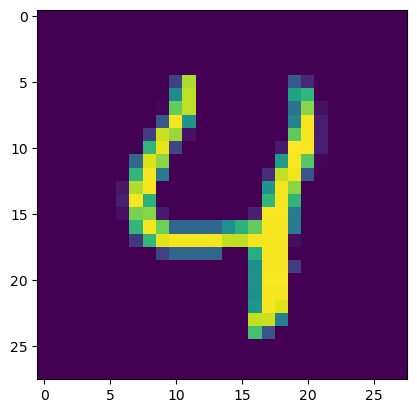

In [134]:
import matplotlib.pyplot as plt
plt.imshow(X_test[4].reshape(28,28))

In [138]:
predictions[4]

4